In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [2]:
# Read data from HDFS into a DataFrame
df = spark.read.csv("hdfs://localhost:9000/input/Sales.csv", header=True )


In [3]:
df.createOrReplaceTempView('sales')
df.show()

+----------+---+---------+----+------------+--------------------+---------------+---------+----------------+----------------+------------+-------------------+--------------+---------+----------+------+----+-------+
|      Date|Day|    Month|Year|Customer_Age|           Age_Group|Customer_Gender|  Country|           State|Product_Category|Sub_Category|            Product|Order_Quantity|Unit_Cost|Unit_Price|Profit|Cost|Revenue|
+----------+---+---------+----+------------+--------------------+---------------+---------+----------------+----------------+------------+-------------------+--------------+---------+----------+------+----+-------+
|2013-11-26| 26| November|2013|          19|         Youth (<25)|              M|   Canada|British Columbia|     Accessories|  Bike Racks|Hitch Rack - 4-Bike|             8|       45|       120|   590| 360|    950|
|2015-11-26| 26| November|2015|          19|         Youth (<25)|              M|   Canada|British Columbia|     Accessories|  Bike Racks|Hi

# EDA

In [4]:
### Convert df into pandas dataframe

In [5]:
pandas_df = df.toPandas()

In [6]:
len(pandas_df)

113036

In [7]:
pandas_df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [8]:
pandas_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113031    False
113032    False
113033    False
113034    False
113035    False
Length: 113036, dtype: bool

In [9]:
# !pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

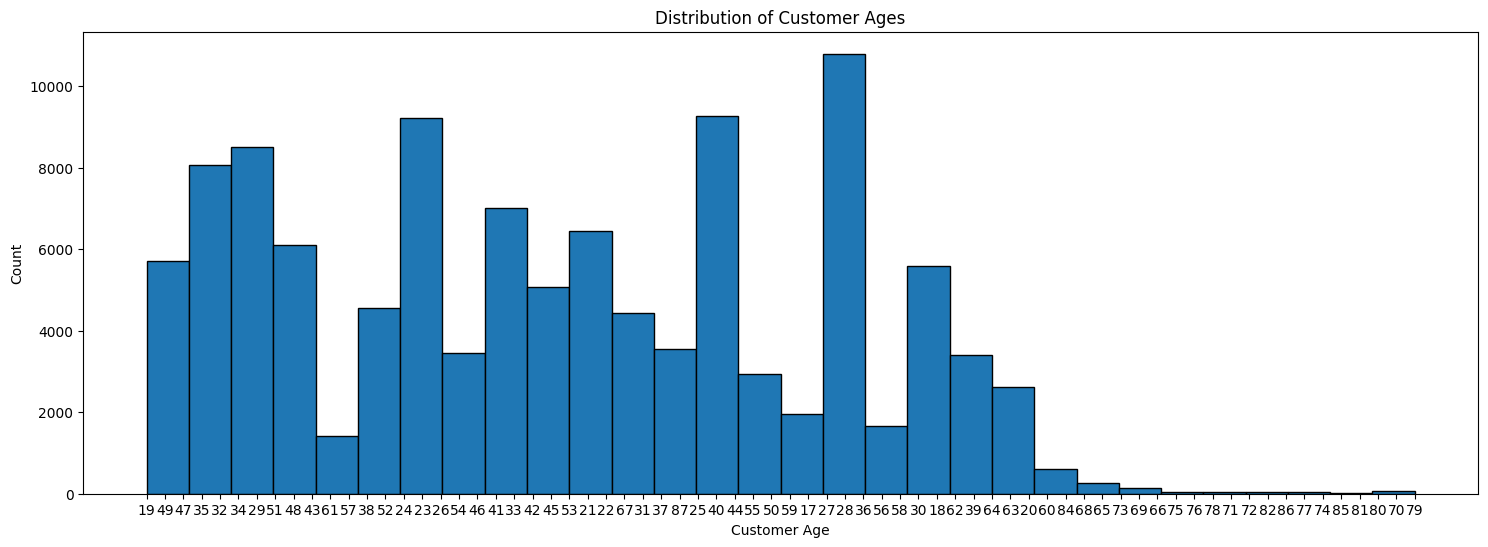

In [46]:

# plt.hist(pandas_df['Customer_Age'], bins=10, edgecolor='k')
# plt.xlabel('Customer Age')
# plt.ylabel('Count')
# plt.title('Distribution of Customer Ages')
# plt.show()



# Increase the size of the plot
plt.figure(figsize=(18, 6))
plt.hist(pandas_df['Customer_Age'], bins=30, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Ages')
plt.show()


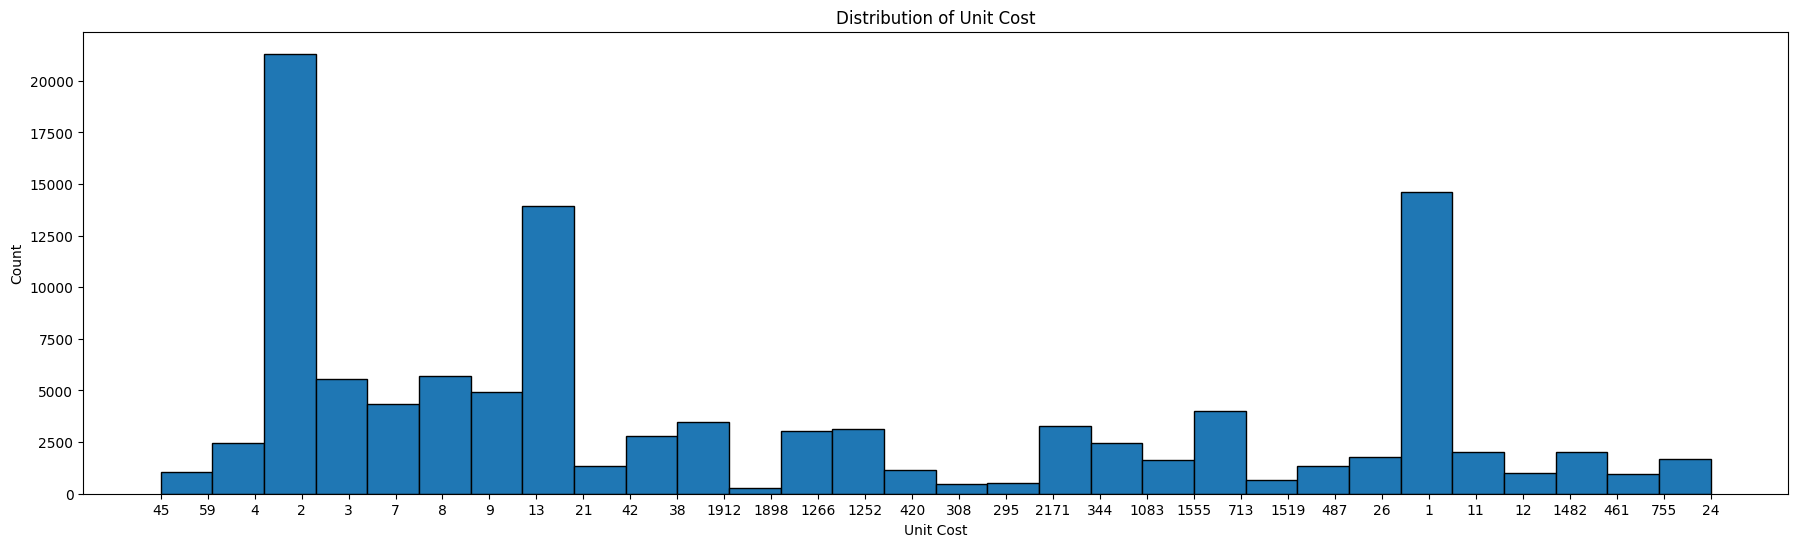

In [11]:
# plt.scatter(pandas_df['Unit_Cost'], pandas_df['Profit'], alpha=0.5)
# plt.xlabel('Unit Cost')
# plt.ylabel('Profit')
# plt.title('Profit vs. Unit Cost')
# plt.show()


# # Increase the size of the plot
# plt.figure(figsize=(12, 16))

# plt.scatter(pandas_df['Unit_Cost'], pandas_df['Profit'], alpha=0.5)
# plt.xlabel('Unit Cost')
# plt.ylabel('Profit')
# plt.title('Profit vs. Unit Cost')
# plt.show()




# Increase the size of the plot
plt.figure(figsize=(22, 6))

plt.hist(pandas_df['Unit_Cost'], bins=30, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('Unit Cost')
plt.ylabel('Count')
plt.title('Distribution of Unit Cost')
plt.show()

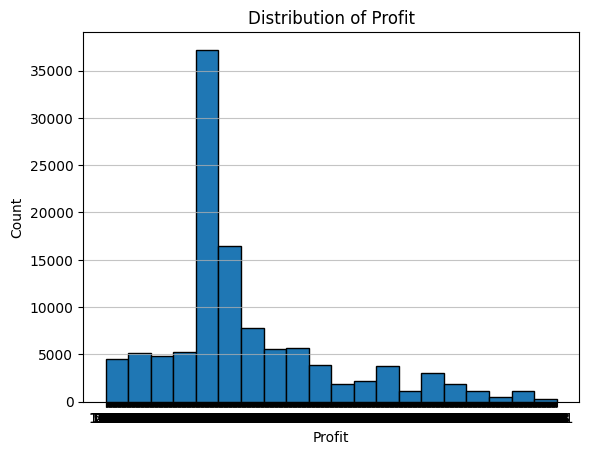

In [12]:
plt.hist(pandas_df['Profit'], bins=20, edgecolor='k')
plt.xlabel('Profit')
plt.ylabel('Count')
plt.title('Distribution of Profit')
plt.grid(axis='y', alpha=0.75)
plt.show()


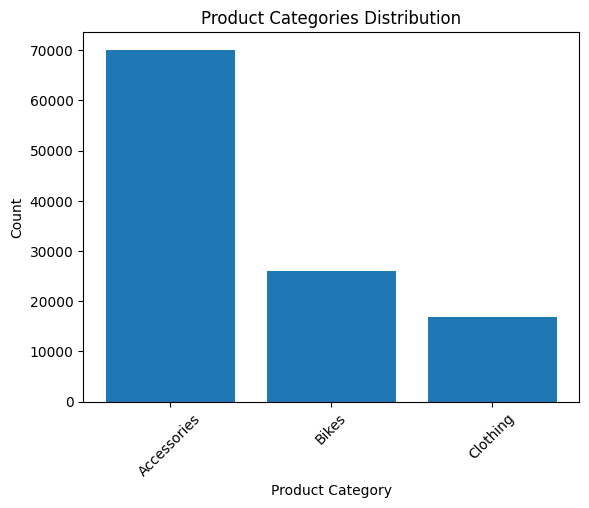

In [13]:
product_counts = pandas_df['Product_Category'].value_counts()
plt.bar(product_counts.index, product_counts.values)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Product Categories Distribution')
plt.xticks(rotation=45)
plt.show()

In [14]:
# !pip install openpyxl

# Goal 1: Analyze the total bike sales revenue across different months.  

In [15]:
# goal1_result_df = spark.sql('SELECT Month, SUM(Revenue) AS TotalRevenue FROM sales GROUP BY Month ORDER BY  Month');
goal1_result_df = spark.sql("SELECT Month, SUM(Revenue) AS TotalRevenue FROM sales GROUP BY Month ORDER BY CASE WHEN Month = 'January' THEN 1 WHEN Month = 'February' THEN 2  WHEN Month = 'March' THEN 3 WHEN Month = 'April' THEN 4 WHEN Month = 'May' THEN 5 WHEN Month = 'June' THEN 6  WHEN Month = 'July' THEN 7  WHEN Month = 'August' THEN 8  WHEN Month = 'September' THEN 9 WHEN Month = 'October' THEN 10 WHEN Month = 'November' THEN 11 WHEN Month = 'December' THEN 12 END");
goal1_pandas_df = goal1_result_df.toPandas()

In [16]:
goal1_pandas_df

,Month,TotalRevenue
0,January,7005895.0
1,February,6834583.0
2,March,7347164.0
3,April,7602750.0
4,May,8836763.0
5,June,9043008.0
6,July,5721459.0
7,August,5711193.0
8,September,5841885.0
9,October,5995079.0


In [17]:
# Save the Pandas DataFrame to an Excel file
excel_file_path = "Goal1.xlsx"
goal1_pandas_df.to_excel(excel_file_path, index=False)

# Goal 2: Analysis of total bikes sales profits across different countries.  

In [18]:
goal2_result_df = spark.sql('SELECT Country, format_number(SUM(Profit), 0) AS TotalProfit FROM sales GROUP BY Country ORDER BY TotalProfit DESC');
goal2_pandas_df = goal2_result_df.toPandas()

In [19]:
goal2_pandas_df

,Country,TotalProfit
0,Australia,"6,776,030"
1,United Kingdom,"4,413,853"
2,Canada,"3,717,296"
3,Germany,"3,359,995"
4,France,"2,880,282"
5,United States,"11,073,644"


In [20]:
# Save the Pandas DataFrame to an Excel file
excel_file_path = "Goal2.xlsx"
goal2_pandas_df.to_excel(excel_file_path, index=False)

# Goal 3: Analyzing which subcategory has the highest unit price.  

In [37]:
goal3_result_df = spark.sql('''
    SELECT Sub_Category, MAX(CAST(Unit_Price AS DECIMAL(10, 0))) AS HighestUnitPrice
    FROM sales
    GROUP BY Sub_Category
    ORDER BY HighestUnitPrice DESC
''');
goal3_pandas_df = goal3_result_df.toPandas()

In [38]:
goal3_pandas_df

,Sub_Category,HighestUnitPrice
0,Road Bikes,3578
1,Mountain Bikes,3400
2,Vests,2384
3,Touring Bikes,2384
4,Bike Stands,159
5,Bike Racks,120
6,Shorts,70
7,Socks,70
8,Hydration Packs,55
9,Jerseys,54


In [39]:
# Save the Pandas DataFrame to an Excel file
excel_file_path = "Goal3.xlsx"
goal3_pandas_df.to_excel(excel_file_path, index=False)

# Goal 4: Comparison of average orders placed by different age groups.  

In [40]:
goal4_result_df = spark.sql('SELECT Age_Group, AVG(Order_Quantity) AS AvgOrdersPlaced FROM sales GROUP BY Age_Group');
goal4_pandas_df = goal4_result_df.toPandas()

In [41]:
goal4_pandas_df

,Age_Group,AvgOrdersPlaced
0,Youth (<25),12.124018
1,Adults (35-64),12.045303
2,Seniors (64+),13.530137
3,Young Adults (25-34),11.560899


In [42]:
# Save the Pandas DataFrame to an Excel file
excel_file_path = "Goal4.xlsx"
goal4_pandas_df.to_excel(excel_file_path, index=False)

# Goal 5: Comparison of profits across different product categories 

In [47]:
goal5_result_df = spark.sql('SELECT Product_Category, format_number(SUM(Profit), 0) AS TotalProfit FROM sales GROUP BY Product_Category ORDER BY TotalProfit DESC');
goal5_pandas_df = goal5_result_df.toPandas()

In [48]:
goal5_pandas_df

,Product_Category,TotalProfit
0,Accessories,"8,862,377"
1,Bikes,"20,519,276"
2,Clothing,"2,839,447"


In [49]:
# Save the Pandas DataFrame to an Excel file
excel_file_path = "Goal5.xlsx"
goal5_pandas_df.to_excel(excel_file_path, index=False)

# Goal 6: Analysis of buying habits of different product categories across different genders.  

In [53]:
goal6_result_df = spark.sql('SELECT Customer_Gender, Product_Category, COUNT(Order_Quantity) AS TotalOrderQuantity FROM sales GROUP BY Customer_Gender, Product_Category ORDER BY Customer_Gender, Product_Category');
goal6_pandas_df = goal6_result_df.toPandas()

In [54]:
goal6_pandas_df

,Customer_Gender,Product_Category,TotalOrderQuantity
0,F,Accessories,33844
1,F,Bikes,12852
2,F,Clothing,8028
3,M,Accessories,36276
4,M,Bikes,13130
5,M,Clothing,8906


In [55]:
# Save the Pandas DataFrame to an Excel file
excel_file_path = "Goal6.xlsx"
goal6_pandas_df.to_excel(excel_file_path, index=False)